### Problem 9.1 Consider a model where the prior distribution over the parameters is a normal 2 distribution with mean zero and variance σϕ so that P r(ϕ) = J Y 2 Normϕj [0, σϕ ], (9.21) j=1 Qwhere j indexes the model parameters. We now maximize Ii=1 P r(yi |xi , ϕ)P r(ϕ). Show that the associated loss function of this model is equivalent to L2 regularization.

Negating and taking the log, we have

\begin{align}
    -\log \left[ \Pi_i^I Pr(\mathbf{y}_i | \mathbf{x}_i, \phi) Pr(\phi) \right] &= - \sum_i^I \log[Pr(\mathbf{y}_i | \mathbf{x}_i, \phi)] - I\log[Pr[\phi]] \\
    &= - \sum_i^I \log[Pr(\mathbf{y}_i | \mathbf{x}_i, \phi)] - I\log[\Pi_j^J Norm_{\phi_j}[0, \sigma_{\phi}^2]] \\
    &= - \sum_i^I \log[Pr(\mathbf{y}_i | \mathbf{x}_i, \phi)] - IJ\log\left[\frac{1}{\sqrt{2\pi\sigma_{\phi}^2}}\exp[\frac{\phi^2}{2\sigma_{\phi}^2}]\right] \\
    &= - \sum_i^I \log[Pr(\mathbf{y}_i | \mathbf{x}_i, \phi)] - \frac{IJ}{2\sigma_{\phi}^2}\log\left[\frac{1}{\sqrt{2\pi\sigma_{\phi}^2}}\right]\phi^2 \\
    &= - \sum_i^I \log[Pr(\mathbf{y}_i | \mathbf{x}_i, \phi)] + \lambda\phi^2
\end{align}

where $\lambda$ combines all constants that do not depend on $\phi$

### Problem 9.2 How do the gradients of the loss function change when L2 regularization (equa-tion 9.5) is added?

The gradients get an extra term with magnitude $2\lambda|\phi|$ that points in the direction of the origin (w/r/t the parameters).

### Problem 9.3∗ Consider a linear regression model y = ϕ0 + ϕ1 x with input x, output y, and parameters ϕ0 and ϕ1 . Assume we have I training examples {xi , yi } and use a least squares loss. Consider adding Gaussian noise with mean zero and variance σx2 to the inputs xi at each training iteration. What is the expected gradient update?

\begin{align}
    y &= \phi_0 + \phi_1x \\
    L &= \sum_i (\phi_0 + \phi_1x_i^* - y_i)^2 \\
    &= \sum_i (\phi_0 + \phi_1(x_i + \epsilon_i) - y_i)^2 \\
    \epsilon_i &\sim N(0, \sigma_x^2) \\
    \frac{\partial L}{\partial \phi_0} &= 2 \sum_i \phi_0 + \phi_1(x_i + \epsilon_i) - y_i \\
    E_{\epsilon}\left[\frac{\partial L}{\partial \phi_0}\right] &= 2 \sum_i E[\phi_0 + \phi_1(x_i + \epsilon_i) - y_i] \\
    &= 2 \sum_i \phi_0 + \phi_1(x_i + E[\epsilon_i]) - y_i \\
    &= 2 \sum_i \phi_0 + \phi_1x_i - y_i \\
    \frac{\partial L}{\partial \phi_1} &= 2 \sum_i (\phi_0 + \phi_1(x_i + \epsilon_i) - y_i)(x_i + \epsilon_i) \\
    E_{\epsilon}\left[\frac{\partial L}{\partial \phi_1}\right] &= 2 \sum_i E[(\phi_0 + \phi_1(x_i + \epsilon_i) - y_i)(x_i + \epsilon_i)] \\
    &= 2 \sum_i E[(\phi_0 + \phi_1x_i - y_i)(x_i + \epsilon_i) + \phi_1\epsilon_i(x_i + \epsilon_i)] \\
    &= 2 \sum_i (\phi_0 + \phi_1x_i - y_i)(x_i + E[\epsilon_i]) + E[\phi_1\epsilon_ix_i + \phi_i\epsilon_i^2] \\
    &= 2 \sum_i (\phi_0 + \phi_1x_i - y_i)x_i + \phi_1x_iE[\epsilon_i] + \phi_iE[\epsilon_i^2] \\
    &= 2 \sum_i (\phi_0 + \phi_1x_i - y_i)x_i + \phi_i\sigma_x^2 \\
\end{align}

Which is to say, we'll shrink the $\phi_1$ parameter proportional to the size of the noise. Manipulating the loss would show this gives us an L2 regularizing term on $\phi_1$


### Problem 9.4∗ Derive the loss function for multiclass classification when we use label smooth-ing so that the target probability distribution has 0.9 at the correct class and the remaining probability mass of 0.1 is divided between the remaining Do − 1 classes.

Let's start with the probability that y is a particular class k

\begin{align}
    Pr(y=k | x, \phi) &= softmax_k[f[x, \phi]]
\end{align}

Now we want to modify this to say that 90% of the time that k is the most probable class, we'll choose it and 10% of the time when any of the other $D_o - 1$ classes is chosen, we'll also still choose k.  This means we reduce our initial term by 10% and then we add a new term that says 10% of the time when another class is most probable, we will instead choose this class uniformly from the non-most-probable classes. Or mathematically:

\begin{align}
    Pr^*(y=k | x, \phi) &= 0.9*Pr(y=k | x, \phi) + \frac{0.1}{D_o - 1}Pr(y\ne k | x, \phi)
\end{align}

The loss here will be a log of a product of sums, so not work out into anything nice.

### Problem 9.5 Show that the weight decay parameter update with decay rate λ: ∂L, (9.22) ∂ϕ on the original loss function L[ϕ] is equivalent to a standard gradient update using L2 regular-ization so that the modified loss function L̃[ϕ] is: ϕ ←− (1 − λ)ϕ − α L̃[ϕ] = L[ϕ] + λ X 2 ϕk , 2α(9.23)k where ϕ are the parameters, and α is the learning rate.

Taking our loss as 

\begin{align}
    \tilde{L}[\phi] &= L[\phi] + \frac{\lambda}{2\alpha}\sum_k\phi_k^2
\end{align}

we have

\begin{align}
    \frac{\partial \tilde{L}}{\partial \phi} &= \frac{\partial L}{\partial \phi} + \frac{\lambda}{\alpha}\phi
\end{align}

Then 

\begin{align}
    \phi &\leftarrow \phi - \alpha \frac{\partial \tilde{L}}{\partial \phi} \\
    &= \phi - \alpha \frac{\partial L}{\partial \phi} - \lambda \phi \\
    &= (1 - \lambda)\phi - \alpha \frac{\partial L}{\partial \phi}
\end{align}

### Problem 9.6 Consider a model with parameters ϕ = [ϕ0 , ϕ1 ]T . Draw the L0, L 21 , and L1PP regularization terms in a similar form to figure 9.1b. The LP regularization term is Dd=1 |ϕd | .

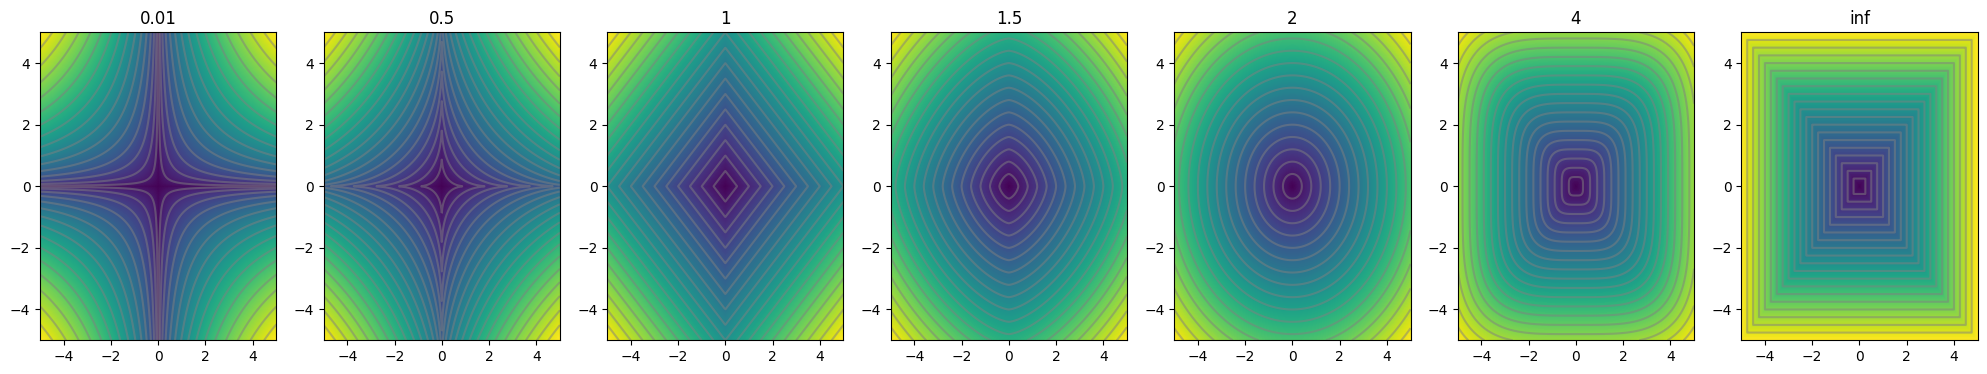

In [19]:
import numpy as np
import matplotlib.pyplot as plt

phi_0 = np.linspace(-5, 5, 1000)
phi_1 = np.linspace(-5, 5, 1000)

p0, p1 = np.meshgrid(phi_0, phi_1)

phi = np.vstack([p0.flatten(), p1.flatten()])


norms = [0.01, 0.5, 1, 1.5, 2, 4, np.inf]

fig, axes = plt.subplots(figsize=(25, 4), ncols=len(norms))

for norm, ax in zip(norms, axes):
    y = np.linalg.norm(phi, norm, axis=0).reshape(p0.shape)
    ax.contour(p0, p1, y, 20, colors=['#80808080'])
    ax.contourf(p0, p1, y, 256)
    ax.set_title(norm)
